# Project: Investigate Medical Appointment No-Show Dataset

### Table of Contents



* Introduction
* Data Wrangling
* Exploratory Analysis
* Conclusion

### Introduction

This project is an analyis performed on a dataset gathered from a medical appointments history. 
It's a data from different patients that scheduled an appoinment with the doctor, receives all the instructions, but does not show up on the appointment day.

The dataset consist of about 14 variables (characteristics). These are: </br>

1. PatientId - Identification of a patient 
2. AppointmentID  -Identification of each appointment 
3. Gender - Male or Female 
4. ScheduledDay - The day of the actuall appointment, when they have to visit the doctor.
5. AppointmentDay - The day someone called or registered the appointment, this is before appointment of course.
6. Age - How old is the patient.
7. Neighbourhood - Where the appointment takes place.
8. Scholarship - True of False .
9. Hipertension - True or False
10. Diabetes - True or False
11. Alcoholism -True or False
12. Handcap -True or False
13. SMS_received - 1 or more messages sent to the patient.
14 No-show - True or False.


### Questions: This analysis will answer the following questions:


    
A. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
</br>
B. Which day of the week do patients scheduled their appoint? </br>
C. What Age group have most Appontments Scheduled? </br>

Importing required Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
#importing the Medical_appointment dataset
data = pd.read_csv(r'C:\\Users\\Master Ridwan\\Desktop\\Medical_appointment.csv', header = 0)

In [3]:
#loading the Medical_appointment 
data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#checking for the number of columns and rows respectively in the dataset
data.shape

(110527, 14)

## DATA WRANGLING

In [5]:
#check if there a null value
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is not have any missing value in the dataset

In [6]:
#check for more information about each column of the dataset (datatype, Non_Null count)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- The Dtype of the dataset's variables are intact except for the 'ScheduledDay' and 'AppointmentDay' which needed to be in datetime

In [7]:
#Check if there is any duplicated row
data.duplicated().sum()

0

In [8]:
#check for number of unique in each column
data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
#change the datatype of the column 'AppointmentDay' and 'ScheduledDay' to datetime dtype
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])

- The Datatype of the column 'AppointmentDay' and 'ScheduledDay' has been changed to datetime dtype 

In [10]:
#checking out the changes 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

#### Data Cleaning

In [11]:
#rename the column name 'ScheduledDay' and 'AppointmentDay' for clarity and user friendly
data = data.rename(columns = {'ScheduledDay': 'ScheduledDate' })
data = data.rename(columns = {'AppointmentDay': 'AppointmentDate' })

- It was neccessary to specify what each columns holds, for exmaple the column 'ScheduledDay' holds the dates. therefore, the column name was needed to be changed to ScheduledDate. In further analysis, we create have a column named ScheduledDay whcih will show the exact day from the dy of the week

In [12]:
#check if change previous changes is implimented
data.head(4)

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [13]:
#Correct the misspelt column names
data = data.rename(columns = {'Hipertension': 'Hypertension' })
data = data.rename(columns = {'Handcap': 'Handicap' })

In [14]:
#replace the value in cloumn 'No-show' for more clarity 
data['No-show'] = data['No-show'].replace(['No', 'Yes'],['ShowedUp','NotShowUp'])

- The values of the variable 'No-Show' was needed to be changed to more understanding of the reader.

Feature Engeneering

In [15]:
#extracting the specific Scheduled Day and Appointment Day from the dates
data['ScheduledDay'] = data['ScheduledDate'].dt.day_name()
data['AppointmentDay'] = data['AppointmentDate'].dt.day_name()

In [16]:
#extracting the specific Scheduled Month and Appointment Month from the dates
data['ScheduledMonth'] = data['ScheduledDate'].dt.month_name()
data['AppointmentMonth'] = data['AppointmentDate'].dt.month_name()

In [17]:
##extracting the specific Appointment Year from the datetime
data['AppointmentYear'] = pd.DatetimeIndex(data['AppointmentDate']).year

In [18]:
#check the different years present in the dataset
data['AppointmentYear'].value_counts()

2016    110527
Name: AppointmentYear, dtype: int64

- New columns were created for each specific ScheduledDay, ScheduledMonth as well as AppointmentDay, AppointmentMonth. This will help us explore more of the data

In [19]:
#Check if the created columns are implemented
data.head(4)

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledDay,AppointmentDay,ScheduledMonth,AppointmentMonth,AppointmentYear
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,ShowedUp,Friday,Friday,April,April,2016
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,ShowedUp,Friday,Friday,April,April,2016
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,ShowedUp,Friday,Friday,April,April,2016
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,ShowedUp,Friday,Friday,April,April,2016


In [20]:
#remove the columns that are not needed for further analysis
data.drop(['PatientId', 'AppointmentID', 'ScheduledDate', 'AppointmentDate'], axis = 1, inplace = True)

Data Cleaning: </br>
* Correct the columns spelling to 'Hipertension' to 'Hypertension' and 'Handcap' to 'Handicap'
* Change the datatype of ScheduledDay and AppointmentDay to datetime dtype
* Change ScheduledDay to ScheduledDate and AppointmentDay to AppointmentDate for specification
* Extracted the ScheduledDay,ScheduledMonth,AppointmentDay,AppointmentDay and AppointmentYear from both ScheduledDate and AppointmentDate
* Remove the columns 'PatientId', 'AppointmentID', 'ScheduledDate', 'AppointmentDate' that are not neccessary for further Exploratory Analysis

In [21]:
data.head(4)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledDay,AppointmentDay,ScheduledMonth,AppointmentMonth,AppointmentYear
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,ShowedUp,Friday,Friday,April,April,2016
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,ShowedUp,Friday,Friday,April,April,2016
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,ShowedUp,Friday,Friday,April,April,2016
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,ShowedUp,Friday,Friday,April,April,2016


## EXPLORATORY DATA ANALYSIS

The Percentage of each Gender for Scheduled Appointment 

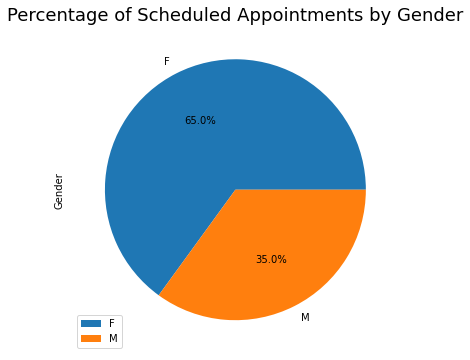

In [22]:
#Show the Percentage of each Gender that booked an appointment 
plt.figure(figsize=(6,6))
data['Gender'].value_counts().plot.pie(autopct="%1.1f%%")
plt.legend()
plt.title ('Percentage of Scheduled Appointments by Gender', size =18)
plt.show()

In [23]:
#check for specifiic gender count
data['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

- We habe 65% of Female and 35% of Male for Scheduled appointment respectively, In counts,  71840 Female and 38687 Male Scheduled appointment respectively

## Question : What Age group have most Appontments Scheduled?

In [24]:
data['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

* The presence -1 looks odd.
lets drop that

In [25]:
#Drop any age that is less na 0
data.drop(data[data['Age'] < 0 ].index, inplace = True)

In [26]:
#check
data[data['Age'] < 0].shape[0]

0

What Age group have most Appontments Scheduled?

In [27]:
#Lets check the top 10 ages that booked appointments
data['Age'].value_counts().head(10)

0     3539
1     2273
52    1746
49    1652
53    1651
56    1635
38    1629
59    1624
2     1618
50    1613
Name: Age, dtype: int64

Text(0.5, 1.0, 'Top Age Present by Doctors Appointment')

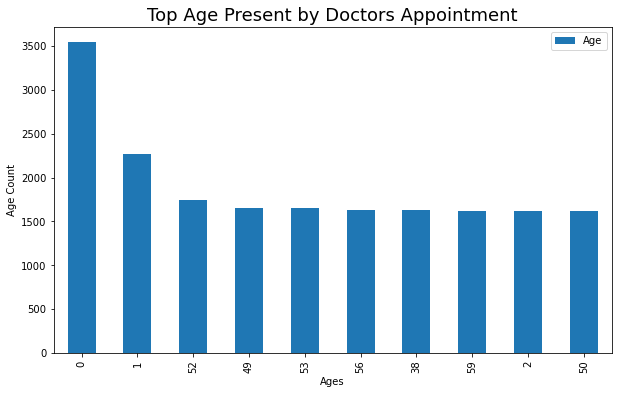

In [28]:
plt.figure(figsize = (10,6))
data['Age'].value_counts().head(10).plot.bar()
plt.legend()
plt.xlabel('Ages')
plt.ylabel('Age Count')
plt.title('Top Age Present by Doctors Appointment', size = 18)

- Infant in age bracket 0-1 have the highest appointment scheduled. of Adult, Also Age above 40 are noticeable 

Neighbourhood

In [29]:
#Check for the unique value in the column 'Neighbourhood'
data['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

Text(0.5, 1.0, 'Top Neighbourhoods with Doctors Scheduled Appointment')

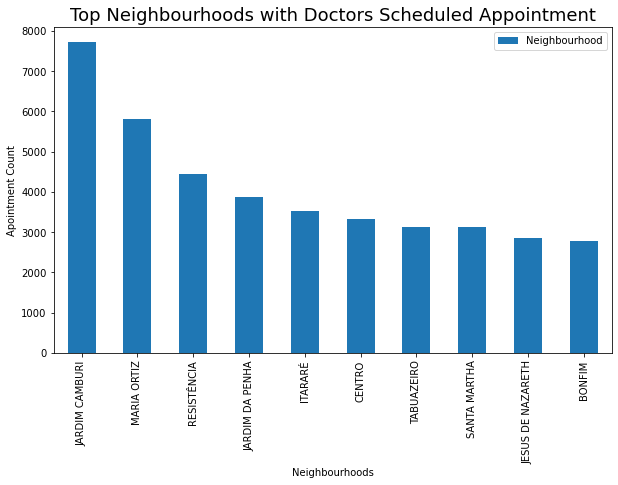

In [30]:
#show the top Neighbourhoods with most scheduled appointment  
plt.figure(figsize = (10,6))
data['Neighbourhood'].value_counts().head(10).plot.bar()
plt.legend()
plt.xlabel('Neighbourhoods')
plt.ylabel('Apointment Count')
plt.title('Top Neighbourhoods with Doctors Scheduled Appointment', size = 18)


In [31]:
# top 10 Neighbourhoods with scheduled appointments by count
data['Neighbourhood'].value_counts().head(10)


JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: Neighbourhood, dtype: int64


- Of 81 Neighbourhoods, Most appointments are booked with the doctors by patients in the JARDIM CAMBURI Neighbourhood 

In [32]:
#define a function to perform a countplot
def Countplot(col):
    '''define a function to take in a column for countplot'''
    plt.figure(figsize = (10,5))
    countplot  =sns.countplot(x = col, data = data)
    return countplot

Text(0.5, 1.0, 'Scheduled Appointment Counts by Scholarship Patients')

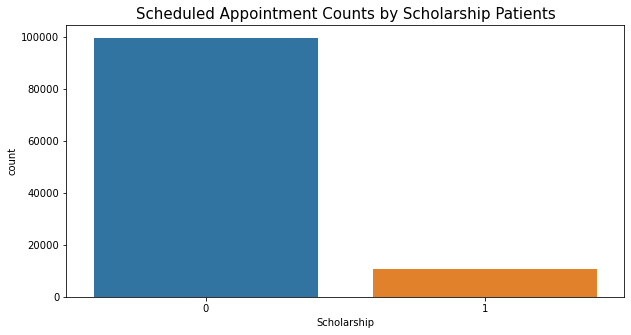

In [33]:
#Plot the count of those that are given Scholarship and those that are not
Countplot('Scholarship')
plt.title('Scheduled Appointment Counts by Scholarship Patients', size = 15)

Hypertension

Text(0.5, 1.0, 'Scheduled Appointment Counts by Hypertensive Patients')

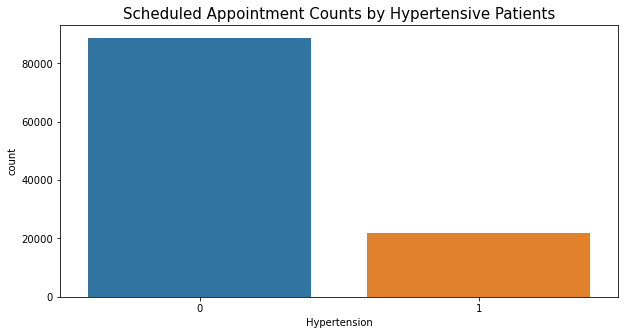

In [34]:
#Plot the count of those that are Hypertensive and those that are not
Countplot('Hypertension')
plt.title('Scheduled Appointment Counts by Hypertensive Patients', size = 15)

In [35]:
#show the specific count of those that are Hypertensive and those that are not
data['Hypertension'].value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

- There are 88726 recorded patients with Hypertension while 21801 without Hypertension

Diabetes

Text(0.5, 1.0, 'Scheduled Appointment Counts by Diabetic Patients')

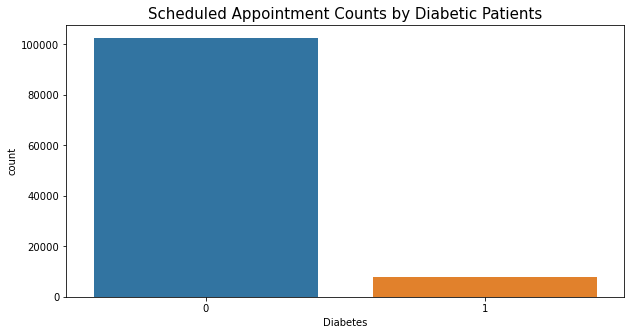

In [36]:
#Plot the count of those that are Diabetic and those that are not
Countplot('Diabetes')
plt.title('Scheduled Appointment Counts by Diabetic Patients', size = 15)

- There are more Diabetic patients than we do not have

Alcoholism

Text(0.5, 1.0, 'Scheduled Appointment Counts by Alcoholic patients')

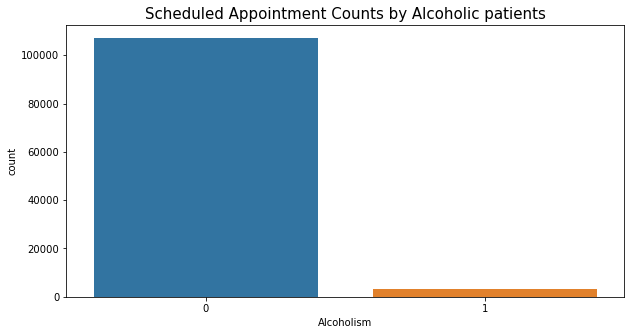

In [37]:
#Plot the count of those that are Alcoholic and those that are not
Countplot('Alcoholism')
plt.title('Scheduled Appointment Counts by Alcoholic patients' , size = 15)

In [38]:
#Show the specfic count of those that are Diabetic and those that are not
data['Alcoholism'].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

- We recorded 107167 Alcoholic patients and 3360 Non-alcoholic patient book Appointment with the doctors

SMS_received

Text(0.5, 1.0, 'Scheduled Appointment Counts by SMS_received Patients')

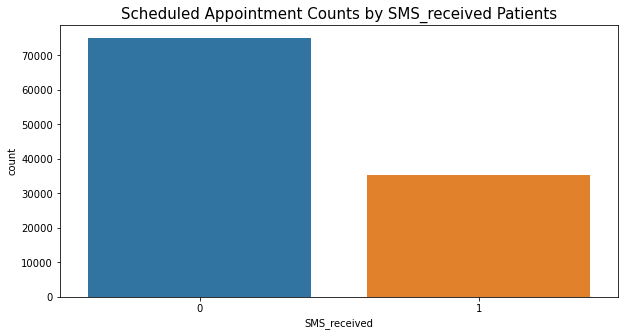

In [39]:
#Plot the count of those that recieved SMS and those that do not
Countplot('SMS_received')
plt.title('Scheduled Appointment Counts by SMS_received Patients', size = 15)

In [40]:
#Show the count of those that recieved SMS and those that do not
data['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

 - Of all scheduled Appointment, Only 35482 patients recieved an SMS while 75045 patients do not 

## Question : Which day of the week do patients scheduled their appointments?


Text(0.5, 1.0, 'Total Sum of Appointments by day of the week')

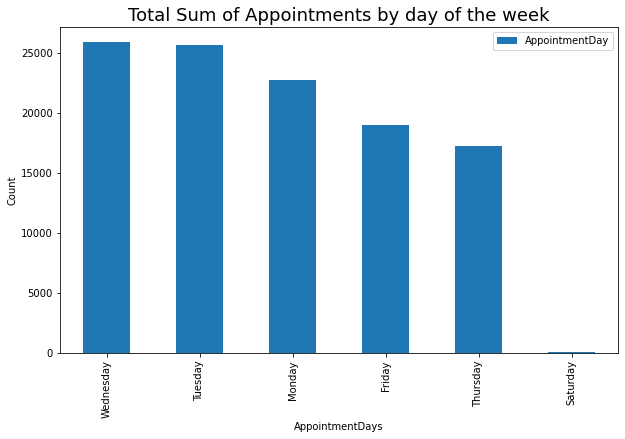

In [41]:
plt.figure(figsize = (10,6))
data['AppointmentDay'].value_counts().plot.bar()
plt.legend()
plt.xlabel('AppointmentDays')
plt.ylabel('Count')
plt.title('Total Sum of Appointments by day of the week', size = 18)

 - We have more appointments schecduled in the part of the week(Monday, Tuesday, Wednesday) and less was scheduled towards the week end


Text(0.5, 1.0, 'Total Sum of Appointments by Month')

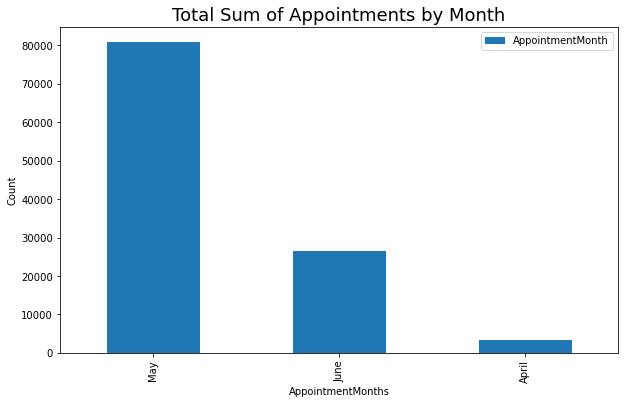

In [42]:
plt.figure(figsize = (10,6))
data['AppointmentMonth'].value_counts().plot.bar()
plt.legend()
plt.xlabel('AppointmentMonths')
plt.ylabel('Count')
plt.title('Total Sum of Appointments by Month', size = 18)

 - We have more appointments schecduled May and less was scheduled in other months

No-show

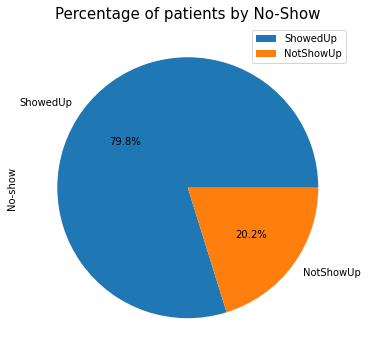

In [43]:
#Check for the percentage patients that showed up and those that do not
plt.figure(figsize=(6,6))
data['No-show'].value_counts().plot.pie(autopct="%1.1f%%")
plt.legend()
plt.title('Percentage of patients by No-Show', size =15)
plt.show()

In [44]:
#Show the specific count of those that showed up and those that do not
data['No-show'].value_counts()

ShowedUp     88207
NotShowUp    22319
Name: No-show, dtype: int64

 - Of all patients that scheduled Appointments, Only 88208 (79.8%) patients Showedup while 22319(20.2%) do not 

## Question: What is the basic reasons some patients do not show up on the appointment day?

#### Lets Explore the NotShowup in the 'No-show' Column

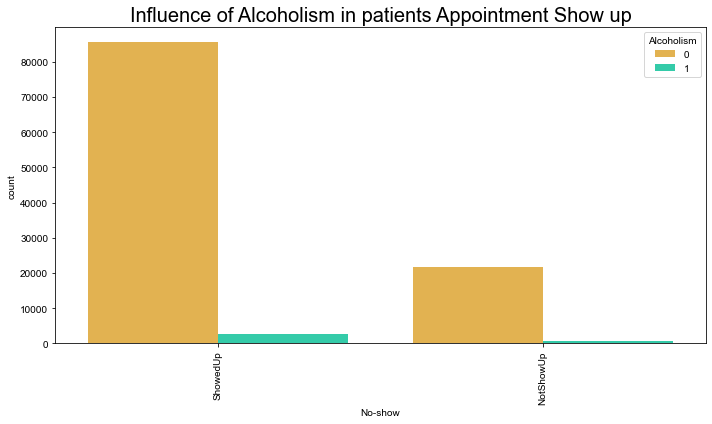

In [45]:
#plot for patients that showed up and those that do not show based on variales named Alcoholism
plt.figure(figsize = (10,6))
sns.countplot (x = "No-show" , hue = "Alcoholism", data = data, palette = 'turbo_r' )
plt.title('Influence of Alcoholism in patients Appointment Show up', size = 20)
plt.xticks(rotation = 90)
sns.set_style("darkgrid")
plt.tight_layout()

- patients who are non alcoholic showed up most. Also such patients have the most percentage of patients that do not show up compared to the alcoholic patients 

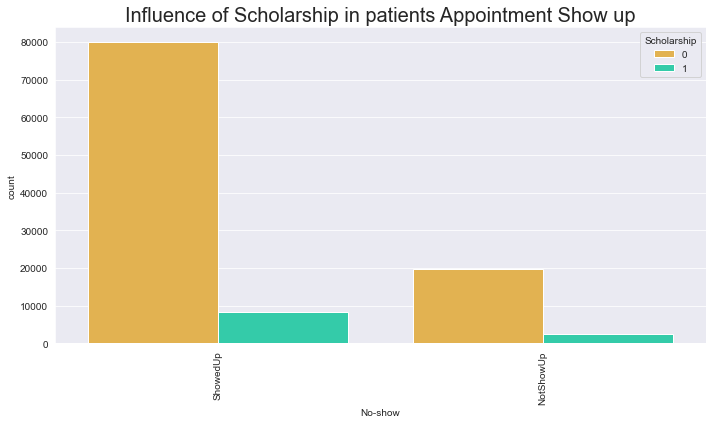

In [46]:
#plot for patients that showed up and those that do not show based on variable named Scholarship
plt.figure(figsize = (10,6))
sns.countplot (x = "No-show" , hue = "Scholarship", data = data, palette = 'turbo_r' )
plt.title('Influence of Scholarship in patients Appointment Show up', size = 20)
plt.xticks(rotation = 90)
sns.set_style("darkgrid")
plt.tight_layout()

- patients who have scholarship showed up most. Also such patients have the most percentage of patients that do not show up compared to those non scholarship patients 

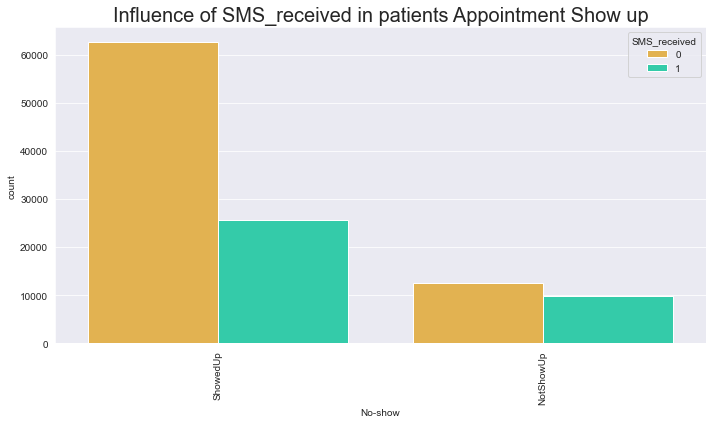

In [47]:
#plot for patients that showed up and those that do not show based on variable named SMS_received
plt.figure(figsize = (10,6))
sns.countplot (x = "No-show" , hue = "SMS_received", data = data, palette = 'turbo_r' )
plt.title('Influence of SMS_received in patients Appointment Show up', size = 20)
plt.xticks(rotation = 90)
sns.set_style("darkgrid")
plt.tight_layout()

- patients who recieved SMS showed up most. Also such patients have the most percentage of patients that do not show up compared to those that do not receive SMS 

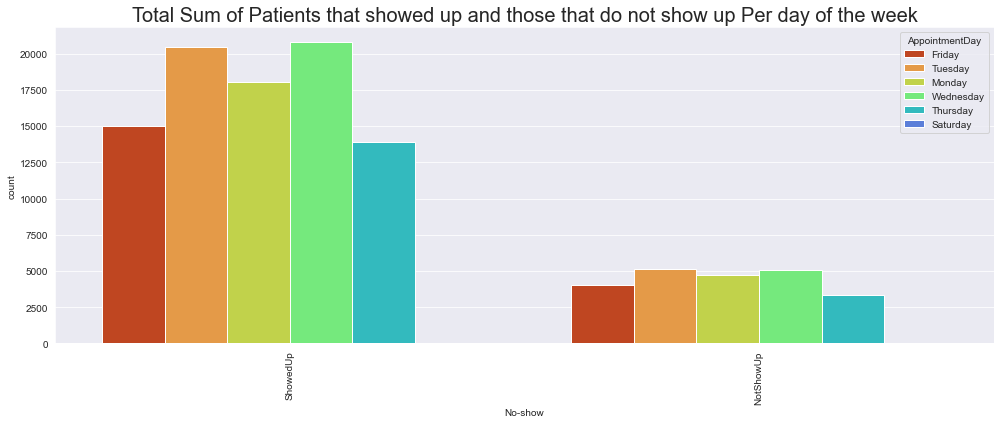

In [48]:
#plot for patients that showed up and those that do not show on each day of the week.
plt.figure(figsize = (14,6))
sns.countplot (x = "No-show" , hue = "AppointmentDay", data = data, palette = 'turbo_r' )
plt.title('Total Sum of Patients that showed up and those that do not show up Per day of the week', size =20)
plt.xticks(rotation = 90)
plt.tight_layout()

- Of all days of the week, Wednesday has been the most Scheduled appointment day for both those that showed up for the appointment and those that do not

#### CONCLUSION

**Results:** After thoroughly analyzing of the dataset, The following questions was answered


1.What is the basic reasons some patients do not show up on the appointment day?

* It could be that most patient do not showup rather scheculed their appointment in towards weekend 
* Probably the patient that do not show up did not recieve SMS
* also may be  patient that do not show up not on scholarsip

2.Which day of the week do patients scheduled their appoint?

* According to the analysis,  It was deduced that We have more appointments schecduled in the part of the week(Monday, Tuesday, Wednesday) and less was scheduled towards the week end

3.What Age group have most Appontments Scheduled?

* The Analysis shows Infant in age bracket 0-1 have the highest appointment scheduled. of Adult,  Age above 40 are more noticeable 



**Limitations** : Some limitations in the data are:

- This Analysis is limited as no advanced statistics were performed only exploratory analysis. 

- The variables in this datasets contains many missing data. as a result, it  was limiting as many entries in the dataset were removed.

- Present of Variable that shows Scheduled Appointment location could have helped me dive deeper to why we have Patient who do not show up


Credit:
    

* Google
* Stackoverflow

### FINAL REPORT

**Report of Investigation on No-Show Appointment Dataset**

Investigating your dataset has been the most important approach to before your start your analysis. This will give you an insight on what on how to clean Up Your Data, Identify the Right Questions, Visualize the Data and eventually Use the Data to Answer Your Questions.

In this project, i investigated the dataset called No-Show Appointment


To begin with, i started by importing the neccessary libraries needed for the project. then load the dataset.

Next, I assessed dataset to find out any abnormalities. It was found out that the dataset was messy. so therefore, required thorough cleaning

During the cleaning process, the following was carried:

* Deleting columns that are not required.
* Handling zero values
* Checking and droping Null values.
* Checking and Removing duplicates.
* Changing the format of release date into DateTime format.
* Handling columns with pipes
* Checking datatype of columns

At the end of Cleaning, analysis and visualisation was perform.  

The following are the questions were answered:

    
**What is the basic reasons some patients do not show up on the appointment day?**

It could be that most patient do not showup rather scheculed their appointment in towards weekend 
Probably the patient that do not show up did not recieve SMS
also may be  patient that do not show up not on scholarsip

**Which day of the week do patients scheduled their appoint?**

According to the analysis,  It was deduced that We have more appointments schecduled in the part of the week(Monday, Tuesday, Wednesday) and less was scheduled towards the week end

**What Age group have most Appontments Scheduled?**

The Analysis shows Infant in age bracket 0-1 have the highest appointment scheduled. of Adult,  Age above 40 are more noticeable 

Aside Answering those questions, i also found out that:

- There are more patient without scholarships than we have for those with scholarships
    
- There are 88726 patients with Hypertension while 21801 without.

-  65% of Female and 35% of Male booked appointment respectively

- In count,  71840 Female and 38687 Male booked appointment respectively
   
- Of 81 Neighbourhood, Most appointments are booked with the doctors by patient in the JARDIM CAMBURI Neighbourhood

- There are more Diabetic patients than we do not have
    
- 107167 Alcoholic patients and 3360 Non-alcoholic patient book Appointment with the doctors
    
- Of all scheduled Appointment, Only 35482 patients recieved an SMS while 75045 patients do not 
    
- There are more scheduled appoinment in the month of May than the rest of the month

- Eventually, Of all scheduled Appointments, Only 88208 (79.8%) patients Showedup while 22319(20.2%) do not 